## t - distributed Stochastic Neighbor Embedding (t-SNE)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the dataset
data = pd.read_csv('climate_data.csv')
data.head()

,temperature,precipitation,humidity,co2_levels,wind_speed,sea_level_rise
0,17.483571,981.882760,40.290589,429.955082,7.747558,2.257752
1,14.308678,654.528792,50.808133,338.392099,1.635120,3.027678
2,18.238443,607.711318,88.206106,405.580543,7.408273,2.956763
3,22.615149,641.413967,76.847271,353.561850,2.255336,3.169446
4,13.829233,1374.304042,46.955450,330.552974,6.331719,2.627995


In [3]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# let's print the scaledd data in DF
print(pd.DataFrame(data_scaled,columns=data.columns).head(3))

   temperature  precipitation  humidity  co2_levels  wind_speed  \
0     0.497154      -0.642090 -1.133148    0.606334    0.057360   
1    -0.135665      -1.395950 -0.522296   -1.200923   -1.357867   
2     0.647615      -1.503765  1.649752    0.125233   -0.021196   

   sea_level_rise  
0       -0.747935  
1        0.026025  
2       -0.045261  


In [5]:
# Import library & initialise the model
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# convert the t-SNE rsults into the df - use that plotting
data_tsne_df = pd.DataFrame(data_tsne,columns=['t-SNE1','t-SNE2'])

C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


C:\Users\rohit\AppData\Local\Temp\ipykernel_15768\1598117788.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='t-SNE1',y='t-SNE2', data= data_tsne_df, palette='coolwarm', s=70,


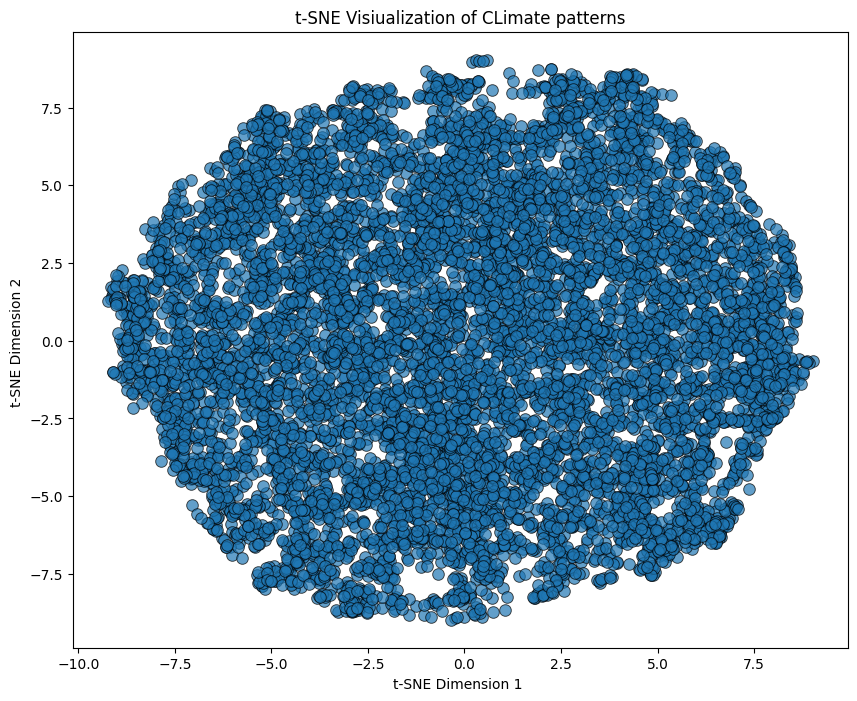

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.scatterplot(x='t-SNE1',y='t-SNE2', data= data_tsne_df, palette='coolwarm', s=70,
                edgecolor='k',alpha=0.7)
plt.title('t-SNE Visiualization of CLimate patterns')
plt.xlabel('t-SNE Dimension 1 ')
plt.ylabel('t-SNE Dimension 2 ')
plt.show()